## Credit Scorint with Pycaret
PyCaret est une bibliothèque alternative low-code qui peut remplacer des centaines de lignes de code par quelques lignes seulement. Cela rend le cycle d'expérience exponentiellement rapide et efficace.

Pour cette étude de cas, nous fournissons une base de données avec 23 333 prêts aux micro- et petites entreprises, décaissés en Mark Bosniaques (BAM) entre octobre 2017 et avril 2019. Voir le fichier ScoringCase_FR.xlsx.
Tous ces prêts ont été suivis pendant 12 mois après déblocage afin d'observer leur comportement de défaut et de remboursement. Pour les cas avec une maturité inférieure à 12 mois, les données reflètent l'état des arriérés sur un éventuel prêt d'enchainement au même client.  Pour chaque prêt, la dernière colonne de la base de données (Bad91d+) indique si le prêt a fait défaut, c.à.d. a atteint 91 jours ou plus d’arriérés à la fin de la période d'observation de 12 mois suivant le déblocage initial (=1).  Ceci est le comportement du crédit [bon=0/mauvais=1] que nous voulons expliquer par le biais de ce scoring d'octroi. 


In [2]:
!pip install jupiter contrib nbextensions

ERROR: Could not find a version that satisfies the requirement jupiter
ERROR: No matching distribution found for jupiter


#  Let's go

## Charger le jeu de données 
**ScoringCase_FR**

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('ScoringCase.xlsx')
df.head()

,ID Prêt,Date Déblocage,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1
0,RRB48,2018-07-24,23,8200,Male,Divorced,Completed University,32.0,1.0,RENT,2,1.0,Region3,0,1,Craftsperson,2550,0
1,KDI90,2018-07-04,21,9575,Male,Widowed,Completed University,44.0,7.0,RENT,1,7.0,Region1,0,1,Personal Services,1950,0
2,NKU187,2018-07-19,21,8200,Female,Married,Completed University,43.0,7.5,Own,5,7.5,Region3,0,3,Personal Services,1775,0
3,UNO260,2018-05-06,22,8425,Male,Married,Completed University,NaN,5.5,Own,3,5.5,Region4,0,3,Personal Services,1800,0
4,QTA277,2018-03-01,21,7625,Female,Married,Completed University,49.0,10.0,Own,3,8.0,Region3,1,3,Car Repair,5275,0


# Créer une copy de la data

In [3]:
df_copy = df.copy()

## Suppression des colonnes 'ID Prêt' et 'Date Déblocage'

In [4]:
df_copy = df_copy.drop(['ID Prêt','Date Déblocage'], axis =1)
df_copy.head()

,Maturité mois,Montant Prêt BAM,Sexe,Etat Civil,Niveau Formation,Age ans,Ans à l'adresse,Locataire / Propriétaire,Nbre de Dépendants,Ans en Activité,Emplacement du business,Crédit Bureau négatif=1,NbreEmployésFamille,Type d'Activité,Ventes Mensuelles BAM,Bad91d+=1
0,23,8200,Male,Divorced,Completed University,32.0,1.0,RENT,2,1.0,Region3,0,1,Craftsperson,2550,0
1,21,9575,Male,Widowed,Completed University,44.0,7.0,RENT,1,7.0,Region1,0,1,Personal Services,1950,0
2,21,8200,Female,Married,Completed University,43.0,7.5,Own,5,7.5,Region3,0,3,Personal Services,1775,0
3,22,8425,Male,Married,Completed University,NaN,5.5,Own,3,5.5,Region4,0,3,Personal Services,1800,0
4,21,7625,Female,Married,Completed University,49.0,10.0,Own,3,8.0,Region3,1,3,Car Repair,5275,0


## Préparer les données
Après avoir chargé les données, l’étape suivante consiste à préparer les données. À l’aide de PyCaret, 
la préparation des données est simple. Nous pouvons utiliser une fonction appelée setup à partir de la bibliothèque pycaret.
classification. Voici le code pour ce faire:

 - Bad91d+=0 -------> on lui accorde pas un crédit 
 - Bad91d+=1 -------> on lui accorde un crédit

In [5]:
from pycaret.classification import *
st = setup(data =df_copy, target = 'Bad91d+=1',session_id=123)

,Description,Value
0,session_id,123
1,Target,Bad91d+=1
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2333, 16)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparer le modèle

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9743,0.9937,0.9632,0.9949,0.9788,0.9462,0.9471,0.2920
lr,Logistic Regression,0.9731,0.9945,0.9603,0.9959,0.9777,0.9437,0.9448,0.4200
ridge,Ridge Classifier,0.9724,0.0000,0.9553,1.0000,0.9771,0.9426,0.9442,0.0080
lda,Linear Discriminant Analysis,0.9724,0.9946,0.9553,1.0000,0.9771,0.9426,0.9442,0.0340
lightgbm,Light Gradient Boosting Machine,0.9724,0.9912,0.9613,0.9939,0.9773,0.9423,0.9434,0.1150
rf,Random Forest Classifier,0.9718,0.9923,0.9573,0.9969,0.9767,0.9412,0.9425,0.3870
nb,Naive Bayes,0.9712,0.9941,0.9553,0.9979,0.9761,0.9400,0.9415,0.0100
ada,Ada Boost Classifier,0.9700,0.9920,0.9672,0.9839,0.9754,0.9369,0.9372,0.1680
et,Extra Trees Classifier,0.9688,0.9918,0.9563,0.9929,0.9742,0.9347,0.9360,0.3970
dt,Decision Tree Classifier,0.9553,0.9517,0.9672,0.9609,0.9639,0.9052,0.9056,0.0110


## Le modèle “Gradient Boosting Classifier” a de bonnes performances sur presque toutes les métriques

## Nous allons utiliser le “gbc” pour l’étape suivante.

In [7]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9756,0.9939,0.9703,0.9899,0.9800,0.9488,0.9491
1,0.9756,0.9980,0.9604,1.0000,0.9798,0.9491,0.9503
2,0.9695,0.9937,0.9604,0.9898,0.9749,0.9361,0.9368
3,0.9693,0.9822,0.9600,0.9897,0.9746,0.9359,0.9366
4,0.9632,0.9922,0.9400,1.0000,0.9691,0.9237,0.9264
5,0.9877,0.9978,0.9800,1.0000,0.9899,0.9743,0.9746
6,0.9632,0.9906,0.9505,0.9897,0.9697,0.9229,0.9241
7,0.9755,0.9981,0.9703,0.9899,0.9800,0.9483,0.9486
8,0.9816,0.9968,0.9703,1.0000,0.9849,0.9613,0.9620
9,0.9816,0.9943,0.9703,1.0000,0.9849,0.9613,0.9620


## Réglage des hyperparamètres

In [8]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9756,0.9920,0.9703,0.9899,0.9800,0.9488,0.9491
1,0.9756,0.9987,0.9604,1.0000,0.9798,0.9491,0.9503
2,0.9695,0.9940,0.9604,0.9898,0.9749,0.9361,0.9368
3,0.9755,0.9806,0.9700,0.9898,0.9798,0.9486,0.9489
4,0.9571,0.9933,0.9400,0.9895,0.9641,0.9108,0.9126
5,0.9816,0.9978,0.9800,0.9899,0.9849,0.9613,0.9614
6,0.9632,0.9874,0.9505,0.9897,0.9697,0.9229,0.9241
7,0.9755,0.9963,0.9703,0.9899,0.9800,0.9483,0.9486
8,0.9816,0.9941,0.9703,1.0000,0.9849,0.9613,0.9620
9,0.9816,0.9925,0.9703,1.0000,0.9849,0.9613,0.9620


## Évaluation du modèle

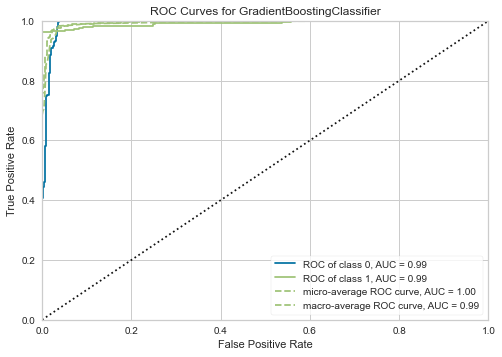

In [9]:
plot_model(tuned_gbc, plot='auc')

## Visualiser l’importance des fonctionnalités 

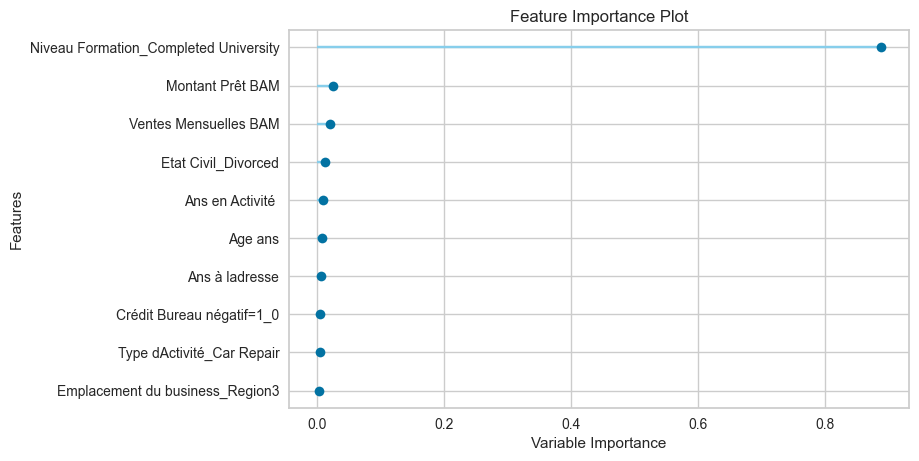

In [10]:
plot_model(tuned_gbc,plot='feature')

## Visualiser la matrice de confusion

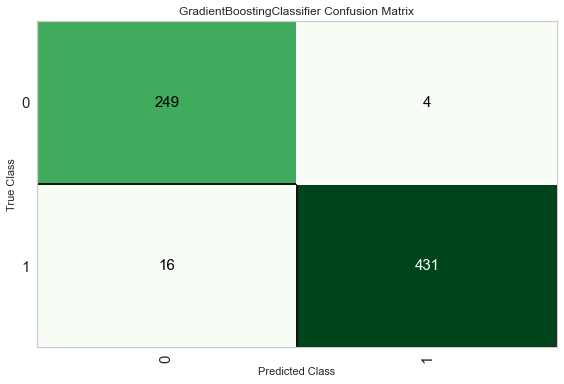

In [11]:
plot_model(tuned_gbc, plot='confusion_matrix')

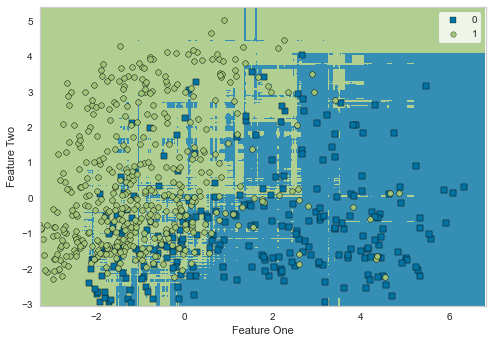

In [12]:
plot_model(tuned_gbc, plot='boundary')

## Test le modèle

In [13]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9714,0.9919,0.9642,0.9908,0.9773,0.9387,0.9394


,Montant Prêt BAM,Age ans,Ans à ladresse,Ans en Activité,Ventes Mensuelles BAM,Maturité mois_16,Maturité mois_17,Maturité mois_18,Maturité mois_19,Maturité mois_20,...,Type dActivité_Car Repair,Type dActivité_Child Care,Type dActivité_Convenience Store,Type dActivité_Craftsperson,Type dActivité_General Contractor,Type dActivité_Personal Services,Type dActivité_Small Grocers,Bad91d+=1,Label,Score
0,10650.0,31.0,0.5,0.5,7525.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9903
1,8725.0,38.0,1.5,1.5,4500.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6244
2,7150.0,35.0,4.0,3.0,2025.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9894
3,7875.0,48.0,8.5,7.0,6050.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9984
4,11475.0,34.0,1.5,1.5,1400.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,11275.0,22.0,0.5,0.5,10725.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.9337
696,8700.0,38.0,6.5,3.5,1600.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9907
697,9350.0,52.0,13.5,9.0,6250.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9908
698,10450.0,37.0,9.5,4.0,2975.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9987


## Enregistrer le modèle

In [14]:
final_gbc = finalize_model(tuned_gbc)

In [15]:
save_model(final_gbc, 'Final_Model_gbc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Bad91d+=1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_i

## Déploiement du modèle sur streamlit